# **Introduction**

This study aims to analyze the factors affecting revenue using the sales data of Walmart, one of the largest retailers in the world. The dataset includes weekly sales data from 45 different Walmart stores, covering various factors that might influence sales performance. The dataset consists of 6435 rows and 8 columns, each representing specific details about the sales and relevant economic indicators.

The columns in the dataset are as follows:

**Store:** This column contains the store number, representing individual Walmart stores. However, there is no information on whether these stores are located in a specific country or region.

**Date:** This column indicates the start date of the sales week. It helps in tracking sales data on a weekly basis and identifying any temporal patterns or trends.

**Weekly_Sales:** This column represents the total sales for a week, measured in dollars. Although the currency is not explicitly stated in the dataset, it is assumed to be in dollars given the context of Walmart's primary market.

**Holiday_Flag:** This binary column indicates the presence or absence of a holiday during the sales week. A value of 1 signifies that the start date of the week coincides with a holiday, while a value of 0 indicates a non-holiday week. This flag helps in analyzing the impact of holidays on weekly sales, providing insights into how holidays might boost or reduce sales.

**Temperature:** This column records the average temperature during the sales week. The temperatures are assumed to be in Fahrenheit, as the maximum temperature recorded in the dataset is around 100, which is more consistent with Fahrenheit than Celsius. This variable can help examine the effect of weather conditions on consumer behavior and sales.

**Fuel_Price: **This column captures the average fuel price in dollars per litre during the sales week. Although the region is not specified, it is assumed to be in dollars, reflecting the cost of fuel in the area where the stores are located. Fuel prices can influence consumer spending power and travel patterns, potentially affecting sales.

**CPI (Consumer Price Index):** This column provides the Consumer Price Index for the relevant period, which measures the average change in prices paid by consumers for goods and services. It is an important indicator of inflation. Analyzing CPI can help determine whether changes in inflation are impacting sales figures.

**Unemployment:** This column shows the unemployment rate, representing the percentage of the labor force that is currently unemployed. This economic indicator helps in understanding the broader economic environment and its effect on consumer spending and sales.

By analyzing these variables, the study aims to identify the key factors that influence Walmart's weekly sales. Understanding these relationships can provide valuable insights into how economic conditions, holidays, weather, and other factors drive revenue, enabling Walmart to make informed decisions to optimize sales strategies and improve overall performance.


**Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import dates
from datetime import datetime
import plotly.graph_objects as go

**Load and Check Data**

In [ ]:
data = pd.read_csv("Walmart_sales.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Data Understanding and EDA**

The data types for the columns in the dataset are as follows:

Store: This column contains the count of Walmart stores and is represented as int64. This data type makes sense because the store number is a discrete numeric value, identifying each store uniquely.

Weekly_Sales: This column represents the sales done for a week in dollars and is of type float64. This data type is appropriate because sales figures are continuous numeric values that can include decimal points.

Temperature: This column records the average temperature for the week, measured in Fahrenheit, and is represented as float64. Since temperature is a continuous variable and can include decimal values, using float64 is suitable.

Fuel_Price: This column indicates the average fuel price in dollars per litre and is also represented as float64. Fuel prices are continuous numeric values, making float64 the appropriate data type.

CPI (Consumer Price Index): This column captures the Consumer Price Index and is of type float64. The CPI is a continuous variable, and representing it as float64 allows for precise calculations and analyses.

Unemployment: This column shows the unemployment rate as a percentage and is represented as float64. Since unemployment rates are continuous and can include decimal values, float64 is the correct data type.

We notice the following columns require specific adjustments for better data handling and analysis:

Date: This column represents the start date of the sales week and is currently of type object. Converting this column to a datetime object is more appropriate as it enables efficient date operations, such as extracting day, month, year, and calculating time differences. Using a datetime object facilitates temporal analysis and helps in identifying trends and patterns over time.

Holiday_Flag: This column marks the presence or absence of a holiday, taking values of 0 or 1, indicating a non-holiday and a holiday week, respectively. Currently, it is represented as an int64. Converting this column to a categorical variable is more meaningful because it represents distinct categories rather than continuous numeric values. By converting Holiday_Flag to a categorical type, it becomes easier to perform categorical operations and analyses, such as grouping and aggregating data based on holiday presence.

These adjustments in data types enhance the accuracy and efficiency of data analysis, making the dataset more suitable for further statistical analysis.

In [ ]:
def check_df(dataframe):
    print("__Shape__")
    print(dataframe.shape)
    print("\n__Columns__")
    print(dataframe.columns)
    print("\n __Info__")
    print(dataframe.info())
    print("\n __Types__")
    print(dataframe.dtypes)
    print("\n __Tail__")
    print(dataframe.tail())
    print("\n__NA__")
    print(dataframe.isnull().sum())

In [ ]:
check_df(dataframe=data)

__Shape__
(6435, 8)

__Columns__
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

 __Info__
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

 __Types__
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: ob

In [ ]:
# Converting the data type of a date column
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
data['CPI'] = data['CPI'].astype('int')
data['Weekly_Sales'] = data['Weekly_Sales'].astype('int')
data['Fuel_Price'] = data['Fuel_Price'].astype('int')
data['Unemployment'] = data['Unemployment'].astype('int')
data['Holiday_Flag'] = data['Holiday_Flag'].astype('category')

In [ ]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690,0,42.31,2,211,8,5,2,2010
1,1,2010-02-12,1641957,1,38.51,2,211,8,12,2,2010
2,1,2010-02-19,1611968,0,39.93,2,211,8,19,2,2010
3,1,2010-02-26,1409727,0,46.63,2,211,8,26,2,2010
4,1,2010-03-05,1554806,0,46.50,2,211,8,5,3,2010


In [ ]:
#statistical description of data
data.describe()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046964e+06,60.663782,2.774204,171.087335,7.512044,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099860e+05,-2.060000,2.000000,126.000000,3.000000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533495e+05,47.460000,2.000000,131.000000,6.000000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,62.670000,3.000000,182.000000,7.000000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420158e+06,74.940000,3.000000,212.000000,8.000000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,100.140000,4.000000,227.000000,14.000000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,18.444933,0.551218,39.348646,1.899471,8.755780,3.238308,0.797019


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int64         
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   int64         
 6   CPI           6435 non-null   int64         
 7   Unemployment  6435 non-null   int64         
 8   Day           6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Year          6435 non-null   int32         
dtypes: category(1), datetime64[ns](1), float64(1), int32(3), int64(5)
memory usage: 433.9 KB


In [ ]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n_Categoric_")
    print(cat_cols)
    print("\n_Numeric_")
    print(num_cols)
    print("\n_Categoric But Cardinal_")
    print(cat_but_car)
    print("\n_Numeric But Categoric_")
    print(num_but_cat)
    print("\n_Columns Overview _")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(data)


_Categoric_
['Holiday_Flag', 'Fuel_Price', 'Year']

_Numeric_
['Store', 'Date', 'Weekly_Sales', 'Temperature', 'CPI', 'Unemployment', 'Day', 'Month']

_Categoric But Cardinal_
[]

_Numeric But Categoric_
['Holiday_Flag', 'Fuel_Price', 'Year']

_Columns Overview _
Observations: 6435
Variables: 11
cat_cols: 3
num_cols: 8
cat_but_car: 0
num_but_cat: 3


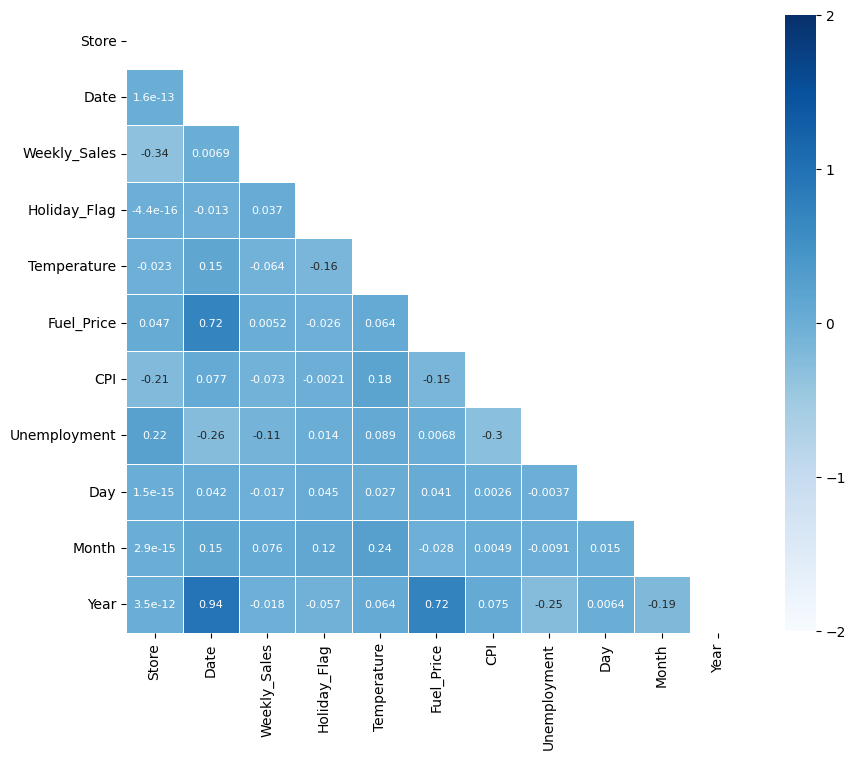

In [ ]:
# relationship between variables
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(corr, mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "Blues",
                      cbar_kws = {'shrink': .8,
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2,
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size":8})
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

**Feature Engineering**

In this analysis, outliers were detected and suppressed using the Interquartile Range (IQR) method, which is a robust statistical technique to identify and handle extreme values in a dataset.

<ipython-input-13-6f2d898bfdcf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


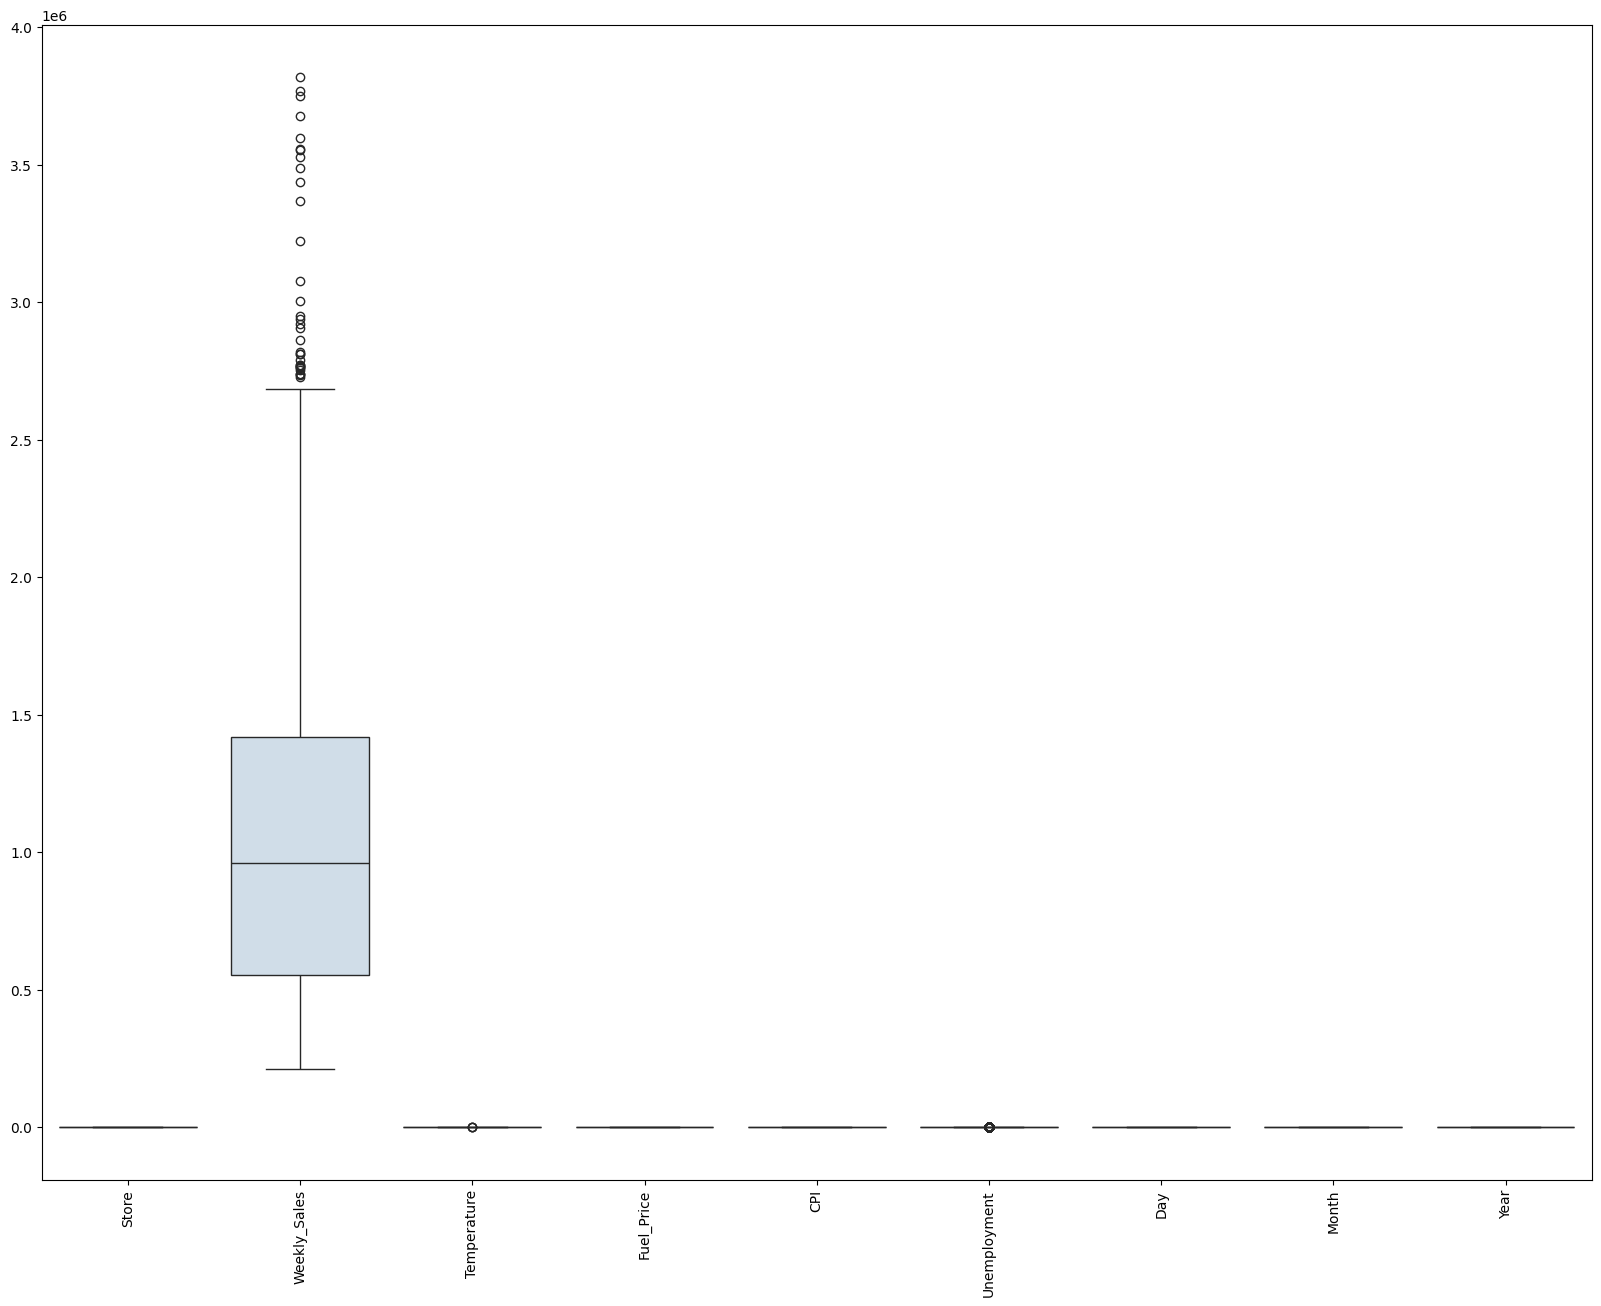

In [ ]:
#outliers values
plt.figure(figsize=(20,15))
ax=sns.boxplot(data = data, palette='BuPu')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

In [ ]:
numeric_value = data.select_dtypes(exclude="object")
numeric_value.shape

(6435, 11)

In [ ]:
numeric_list=['Weekly_Sales']

In [ ]:
#detecting outliers
numeric_list = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for variable in numeric_list:
    q1 = numeric_value[variable].quantile(0.25)
    q3 = numeric_value[variable].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)

    # Detecting outliers
    outliers_below = numeric_value[variable] < lower_limit
    outliers_above = numeric_value[variable] > upper_limit

    # Outliers suppression
    numeric_value.loc[outliers_below, variable] = lower_limit
    numeric_value.loc[outliers_above, variable] = upper_limit

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690,0,42.31,2,211,8,5,2,2010
1,1,2010-02-12,1641957,1,38.51,2,211,8,12,2,2010
2,1,2010-02-19,1611968,0,39.93,2,211,8,19,2,2010
3,1,2010-02-26,1409727,0,46.63,2,211,8,26,2,2010
4,1,2010-03-05,1554806,0,46.50,2,211,8,5,3,2010


**Data Visualization**

Different visualizations were created to examine the impact of various factors on weekly sales, providing a detailed understanding of how these variables influence sales performance. These visualizations will help identify trends, patterns, and potential relationships between sales and other key variables, such as year, week, day, temperature, fuel price, consumer price index (CPI), and unemployment rate.

When analyzing the overall trend of weekly sales across multiple years, a decline in sales was observed.

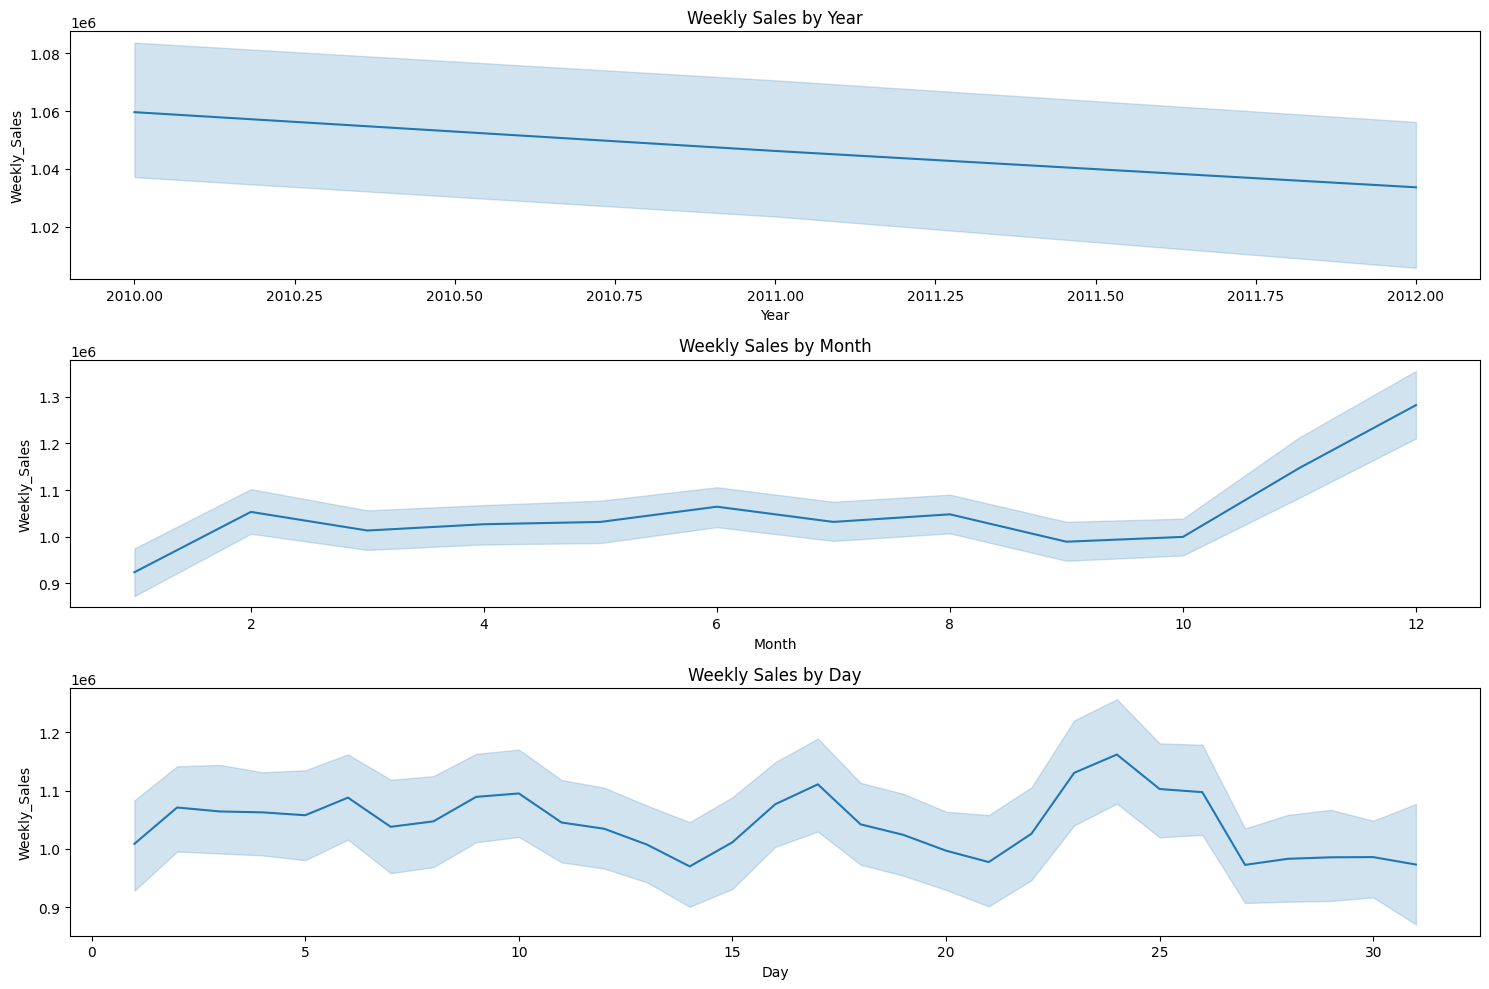

In [ ]:
plt.figure(figsize=(15,10))

for i, time_unit in enumerate(['Year', 'Month', 'Day'], start=1):
    plt.subplot(3, 1, i)
    sns.lineplot(data=data, x=time_unit, y='Weekly_Sales')
    plt.title(f'Weekly Sales by {time_unit}')

plt.tight_layout()
plt.show()

The analysis of the weekly sales data showedthat the 20th store consistently achieved the highest sales figures compared to other stores.

In [ ]:
group = data.groupby(by=['Store'])['Weekly_Sales'].sum().reset_index()
fig = px.bar(group, x='Store', y='Weekly_Sales',
             color='Store', height=400)
fig.update_layout(
    title='Total Weekly Sales by Store', title_x=0.5,
    showlegend=False)
fig.show()

The analysis of weekly sales data revealed that sales income was significantly higher during holidays compared to non-holiday periods.

In [ ]:
total_weekly_sales = data.groupby(by=['Holiday_Flag'])['Weekly_Sales'].mean().reset_index()

fig = go.Figure(data=[go.Pie(
    labels=total_weekly_sales['Holiday_Flag'].astype(str),
    values=total_weekly_sales['Weekly_Sales'],
    text=total_weekly_sales['Weekly_Sales'].astype(str),
    textposition='auto', marker_colors=['slateblue', 'lightcoral']
)])

fig.update_layout(
    title='Total Weekly Sales by Holiday Flag', title_x=0.5,
    showlegend=False)
fig.show()

There is a correlation between the Consumer Price Index (CPI) and weekly sales, with the highest sales occurring when the CPI reaches a value of 188.

In [ ]:
group = data.groupby(by=['CPI'])['Weekly_Sales'].mean().reset_index()
fig = px.line(group, x='CPI', y='Weekly_Sales',
              height=400)

fig.update_layout(
    title='Total Weekly Sales by CPI', title_x=0.5,
    showlegend=False)
fig.show()


In [ ]:
group = data.groupby(by=['Fuel_Price'])['Weekly_Sales'].mean().reset_index()
fig = px.bar(group, x='Fuel_Price', y='Weekly_Sales',
             color='Fuel_Price', height=400)
fig.update_layout(
    title='Total Weekly Sales by Fuel Price', title_x=0.5,
    showlegend=False)
fig.show()

In [ ]:
group = data.groupby(by=['Unemployment'])['Weekly_Sales'].mean().reset_index()
fig = px.bar(group, x='Unemployment', y='Weekly_Sales',
             color='Unemployment', height=400)
fig.update_layout(
    title='Total Weekly Sales by Unployment', title_x=0.5,
    showlegend=False)
fig.show()

In [ ]:
group = data.groupby(by=['Temperature'])['Weekly_Sales'].mean().reset_index()
fig = px.scatter(group, x='Temperature', y='Weekly_Sales',
             color='Temperature', height=400)
fig.update_layout(
    title='Total Weekly Sales by Temperature', title_x=0.5,
    showlegend=False)
fig.show()

**Feature Selection**

 It involves selecting the most relevant features (or variables) from the dataset that contribute the most to predicting the target variable, which is Weekly_Sales. Here used Random Forest method for feature selection.

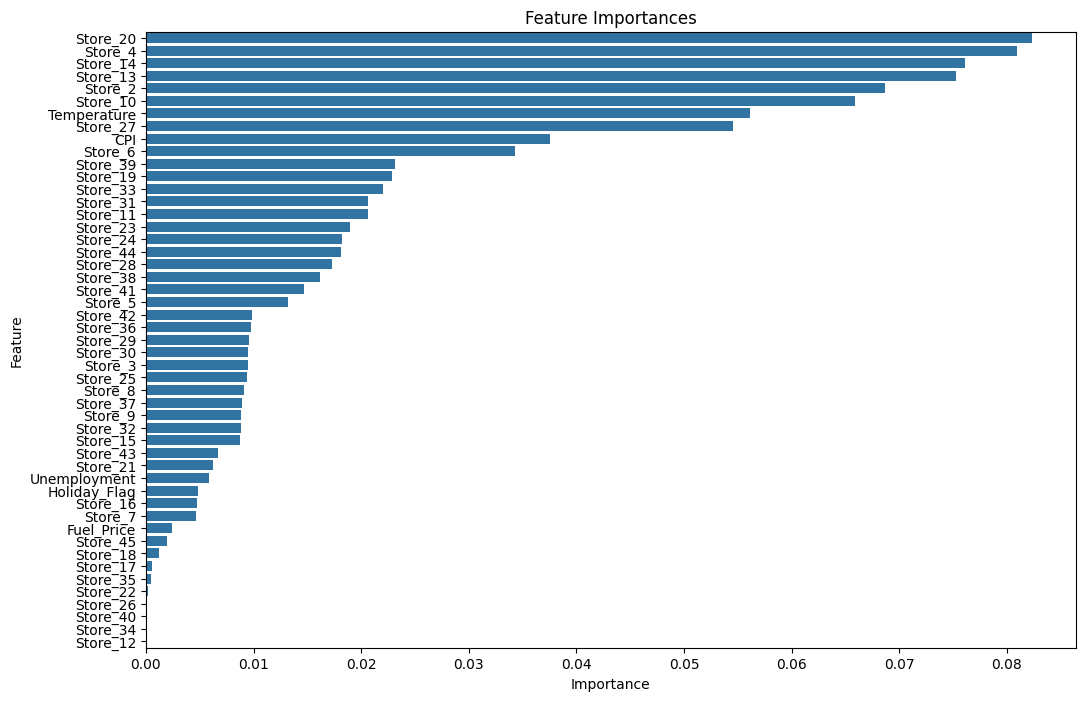

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Store' ]]
y = data['Weekly_Sales']

X = pd.get_dummies(X, columns=['Store'], drop_first=True)

# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()

**Conclusion**

In essence, the analysis serves as a foundation for informed decision-making and strategic planning to enhance sales effectiveness, customer experience, and business success. By understanding the dynamics of sales performance and responding proactively to market trends, businesses can position themselves for sustainable growth and profitability in the retail landscape.





